In [1]:
import numpy as np
from skimage import data
import matplotlib.pyplot as plt

In [2]:
# Looking up attribute, real image often are RGB
img_arr = data.astronaut()
print('shape/type', img_arr.shape, img_arr.dtype)
print('min/max/mean/std', np.min(img_arr), np.max(img_arr), np.average(img_arr), np.std(img_arr))

print('mean/std R', np.average(img_arr[:,:,0]), np.std(img_arr[:,:,0]))
print('mean/std G', np.average(img_arr[:,:,1]), np.std(img_arr[:,:,1]))
print('mean/std B', np.average(img_arr[:,:,2]), np.std(img_arr[:,:,2]))

shape/type (512, 512, 3) uint8
min/max/mean/std 0 255 114.59900410970052 81.23036724707774
mean/std R 141.56249237060547 82.03894198148765
mean/std G 105.75944519042969 76.61546115996879
mean/std B 96.4750747680664 77.85342948916895


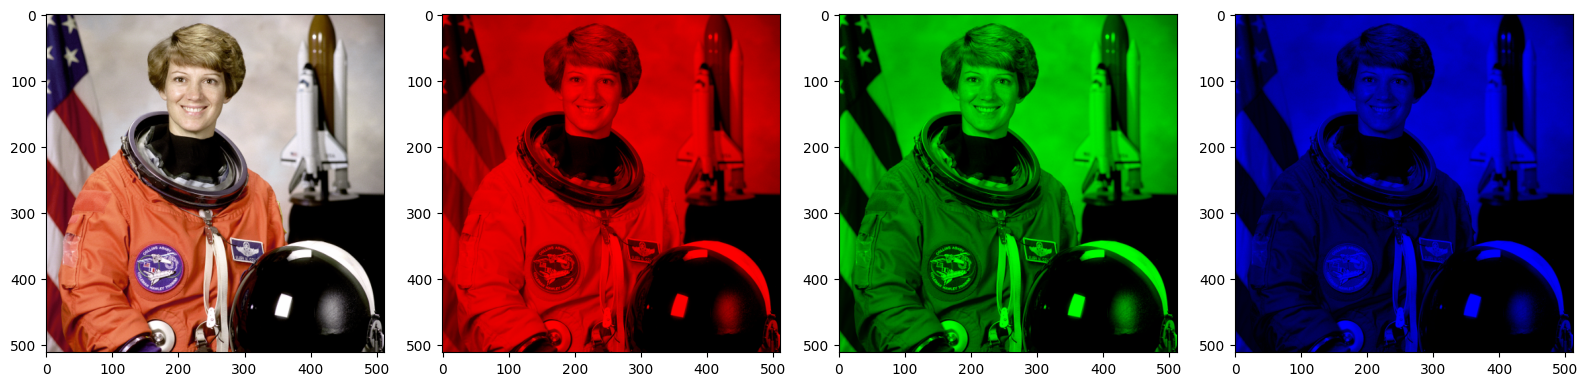

In [3]:
# Plotting image vs each channel
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
im = axs[0].imshow(img_arr)

tmp_arr = img_arr.copy()
tmp_arr[:,:,1:3] = 0
im = axs[1].imshow(tmp_arr)

tmp_arr = img_arr.copy()
tmp_arr[:,:,0:3:2] = 0
im = axs[2].imshow(tmp_arr)

tmp_arr = img_arr.copy()
tmp_arr[:,:,0:2] = 0
im = axs[3].imshow(tmp_arr)

fig.tight_layout()
plt.show()

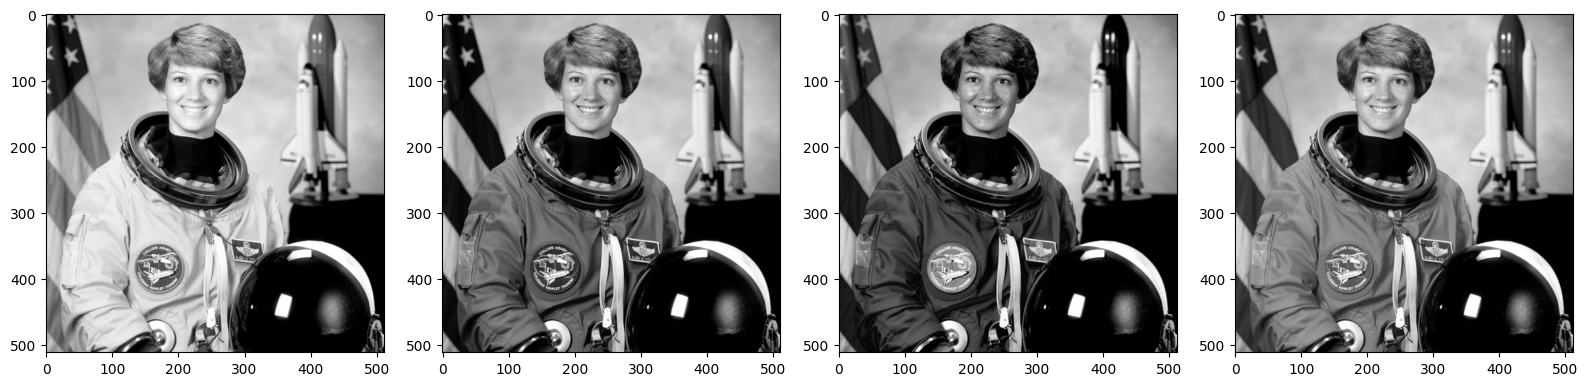

In [4]:
# RGB are still just values
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
gray_arr = np.average(img_arr, axis=-1)
concat_arr = np.append(img_arr, np.expand_dims(gray_arr,axis=-1), axis=-1)
for i, ax in enumerate(axs):
    im = ax.imshow(concat_arr[:,:, i], cmap='gray')

fig.tight_layout()
plt.show()

262144
0 correlation 1.0
1 correlation 0.9324
2 correlation 0.7892
3 correlation 0.6541


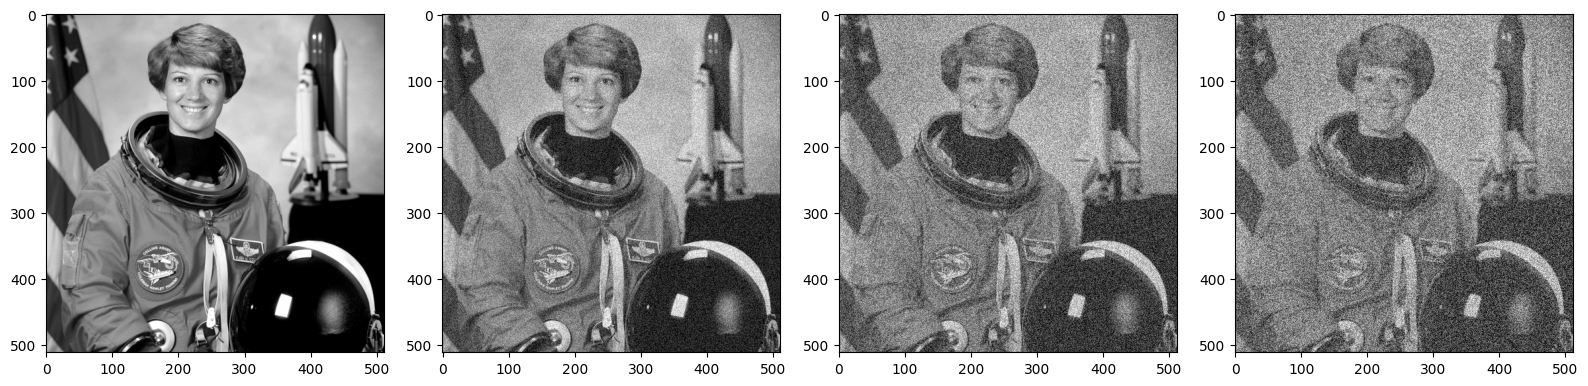

In [5]:
# Adding noise to an image
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
gray_arr = np.average(img_arr, axis=-1)
print(np.prod(gray_arr.shape))
for i, ax in enumerate(axs):
    noise = np.random.random(262144).reshape(gray_arr.shape)*(100*i)
    im = ax.imshow(gray_arr+noise, cmap='gray')
    correlation_coefficient = np.round(np.corrcoef(gray_arr.ravel(), (gray_arr+noise).ravel())[0,1], 4)
    print(i, 'correlation', correlation_coefficient)

fig.tight_layout()
plt.show()

(512, 512)


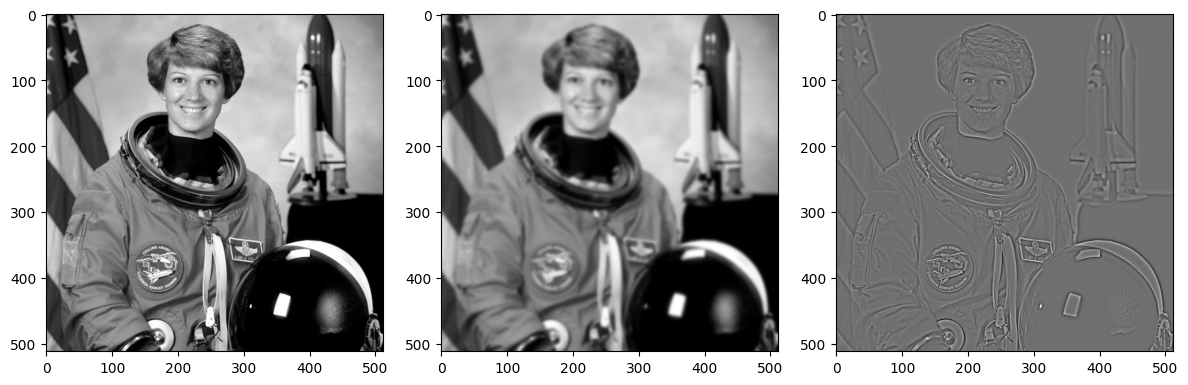

In [6]:
# Blurring and comparing an image
from scipy.ndimage import gaussian_filter

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
im = axs[0].imshow(gray_arr, cmap='gray')

tmp_arr = gaussian_filter(gray_arr, sigma=2)
print(tmp_arr.shape)
im = axs[1].imshow(tmp_arr, cmap='gray')

im = axs[2].imshow(gray_arr - tmp_arr, cmap='gray')

fig.tight_layout()
plt.show()